# Assignment 1
## Experiments
In this part of the assignment you will use the blocks of code which you wrote in the first part of the assignment for the image classification task.


## Table of contents

* [Digits Classification Task](#1.-Digits Classification Task)

# Digits Classification Task
In this task you will implement a neural network for classification. You can use the blocks of code which you implemented in the first part of this assignment for completing this task.

We will use **digits** dataset for this task. This dataset consists of 1797 8x8 images. Further information about the dataset can be found [here](http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
from IPython.core.display import HTML 

We will load this dataset from scikit-learn using the following code 

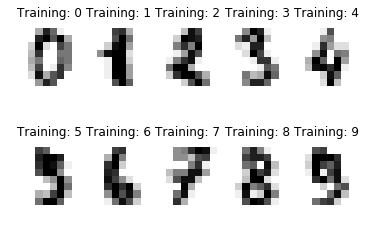

In [2]:
import sklearn.datasets

# We load the dataset
digits = sklearn.datasets.load_digits()

# Here we load up the images and labels and print some examples
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: {}'.format(label), y=1.1)


Next we will divide the images and labels data into two parts i.e. training data and test data.

In [3]:
n_objects = digits.images.shape[0]
train_test_split = 0.7
train_size = int(n_objects * train_test_split)
indices = np.arange(n_objects)
np.random.shuffle(indices)

train_indices, test_indices = indices[:train_size], indices[train_size:]
train_images, train_targets = digits.images[train_indices], digits.target[train_indices]
test_images, test_targets = digits.images[test_indices], digits.target[test_indices]


The images in the dataset are $8 \times 8$ and each pixel in the image is eithe 0 or 1. Before giving the images as input to the neural network we will reshape them to 1 by 64 times long 1 dimensional vector as shown in the figure below.
![in](./images/image_pixel_input.png)

In [4]:
train_images = train_images.reshape((-1, 64))
test_images = test_images.reshape((-1, 64))

The basic units of the neural network are perceptrons. A perceptron consists of a cell with atleast two inputs. Cell takes the inputs multiplied with weights and gives an output after computing the values. The basic diagram of a cell is shown below.
![neuron](./images/neuron.png)
For the image dataset which we will be using in this task the perceptron will have 64 inputs for $8 \times 8$ input and 64 weights.
![N_weights](./images/weights.png)
As the digits dataset consists of 10 classes (0 to 9) so, in order to classifiy the images we will need 10 neurons for the prediction of the target class. It can be seen from the image each neuron will give an output and the output from the neuron with the highest value will be selected and that will be the predicted output.
![NN](./images/design.png)
Now, in order to perform classification task for images you will use the functions which you implemented in the first task of the assignment.

In [7]:
def dense_forward(x_input, W, b):
    """Matrix multiplication operation
    # Arguements
        x_input:def dense_grad_input(x_input, grad_output, W, b):
    Matrix multiplication gradient
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
        grad_output: np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    """
    #################
    ### YOUR CODE ###
    #################
    """
    return grad_input np.array of size `(n_objects, n_in)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    """
    #################
    ### YOUR CODE ###
    #################
    return output

In [8]:
def dense_grad_input(x_input, grad_output, W, b):
    """Matrix multiplication gradient
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
        grad_output: np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_input

In [9]:
def dense_grad_W(x_input, grad_output, W, b):
    """W gradient computation
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
        grad_output: np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_W

def dense_grad_b(x_input, grad_output, W, b):
    """b gradient computation
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
        grad_output: np.array of size `(n_objects, n_out)`
        W: np.array of size `(n_in, n_out)`
        b: np.array of size `(n_out,)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_b

In [10]:
class Layer(object):
    
    def __init__(self):
        self.training_phase = True
        self.output = None
        
    def forward(self, x_input):
        self.output = x_input
        return self.output
    
    def backward(self, x_input, grad_output):
        return grad_output
    
    def get_params(self):
        return []
    
    def get_params_gradients(self):
        return []

In [11]:
class Dense(Layer):
    
    def __init__(self, n_input, n_output):
        super(Dense, self).__init__()
        #Randomly initializing the weights from normal distribution
        self.W = np.random.normal(size=(n_input, n_output))
        self.grad_W = np.zeros_like(self.W)
        #initializing the bias with zero
        self.b = np.zeros(n_output)
        self.grad_b = np.zeros_like(self.b)
      
    def forward(self, x_input):
        self.output = dense_forward(x_input, self.W, self.b)
        return self.output
    
    def backward(self, x_input, grad_output):
        # get gradients of weights
        self.grad_W = dense_grad_W(x_input, grad_output, self.W, self.b)
        self.grad_b = dense_grad_b(x_input, grad_output, self.W, self.b)
        # propagate the gradient backwards
        return dense_grad_input(x_input, grad_output, self.W, self.b)
    
    def get_params(self):
        return [self.W, self.b]

    def get_params_gradients(self):
        return [self.grad_W, self.grad_b]

If you have implemented the advanced section of the first part of assignment then by completing the next blocks for *drop out* implementation you can check the dropout for image classification task. But as the implementation of *drop out* was optional so, if you didn't implement it you can skip this part. 

In [12]:
def dropout_generate_mask(shape, drop_rate):
    """Generate mask 
    # Arguements
        shape: shape of the input array 
            tuple 
        drop_rate: probability of the element 
            to be multiplied by 0
            scalar
    # Output
        binary mask 
    """
    #################
    ### YOUR CODE ###
    #################
    return mask

In [13]:
def dropout_forward(x_input, mask, drop_rate, training_phase):
    """Perform the mapping of the input
    # Arguements
        x_input: input of the layer 
            np.array of size `(n_objects, n_in)`
        mask: binary mask
            np.array of size `(n_objects, n_in)`
        drop_rate: probability of the element to be multiplied by 0
            scalar
        training_phase: bool eiser `True` - training, or `False` - testing
    # Output
        the output of the dropout layer 
        np.array of size `(n_objects, n_in)`
    """
    #################
    ### YOUR CODE ###
    #################
    return output

In [14]:
def dropout_grad_input(x_input, grad_output, mask):
    """Calculate the partial derivative of 
        the loss with respect to the input of the layer
    # Arguements
        x_input: input of a dense layer - np.array of size `(n_objects, n_in)`
        grad_output: partial derivative of the loss functions with 
            respect to the ouput of the dropout layer 
            np.array of size `(n_objects, n_in)`
        mask: binary mask
            np.array of size `(n_objects, n_in)`
    # Output
        the partial derivative of the loss with 
        respect to the input of the layer
        np.array of size `(n_objects, n_in)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_input

In [15]:
class Dropout(Layer):
    
    def __init__(self, drop_rate):
        super(Dropout, self).__init__()
        self.drop_rate = drop_rate
        self.mask = 1.0
        
    def forward(self, x_input):
        if self.training_phase:
            self.mask = dropout_generate_mask(x_input.shape, self.drop_rate)
        self.output = dropout_
        return self.output
    
    def backward(self, x_input, grad_output):
        grad_input = ## COMPUTE THE GRADIENT OF THE OUTPUT WITH RESPECT TO THE INPUT ##
        return grad_input

SyntaxError: invalid syntax (<ipython-input-15-6af80e6e54f9>, line 15)

In [16]:
def relu_forward(x_input):
    """relu nonlinearity
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
    """
    #################
    ### YOUR CODE ###
    #################
    return output

def relu_grad_input(x_input, grad_output):
    """relu nonlinearity gradient
    # Arguements
        x_input: np.array of size `(n_objects, n_in)`
            grad_output: np.array of size `(n_objects, n_in)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_input

In [17]:
class ReLU(Layer):
        
    def forward(self, x_input):
        self.output = relu_forward(x_input)
        return self.output
    
    def backward(self, x_input, grad_output):
        return relu_grad_input(x_input, grad_output)

In [18]:
class Softmax(Layer):
    
    def __init__(self):
        super(Softmax, self).__init__()
        self.output = None

    def forward(self, x_input):
        normalized = x_input - x_input.max(1, keepdims=True)
        exp_ = np.exp(normalized)
        self.output = exp_ / exp_.sum(1).reshape(-1, 1)
        return self.output
    
    def backward(self, x_input, grad_output):
        y_dy = grad_output * self.output
        sum_y_dy = np.sum(y_dy, axis=1, keepdims=True)
        return y_dy - sum_y_dy * self.output

In [19]:
class SequentialNN(object):

    def __init__(self):
        self.layers = []
        
    def add(self, layer):
        self.layers.append(layer)
        
    def forward(self, x_input):
        self.output = x_input
        for layer in self.layers:
            self.output = layer.forward(self.output)
        return self.output
    
    def backward(self, x_input, grad_output):
        inputs = [x_input] + [l.output for l in self.layers[:-1]]
        
        for input_, layer_ in zip(inputs[::-1], self.layers[::-1]):
            grad_output = layer_.backward(input_, grad_output)
            
    
    def get_params(self):
        return [layer.get_params() for layer in self.layers]
    
    def get_params_gradients(self):
        return [layer.get_params_gradients() for layer in self.layers]

In [20]:
class Loss(object):
    
    def __init__(self):
        self.output = None
        
    def forward(self, y_pred, y_true):
        self.output = 0.0
        return self.output
    
    def backward(self, y_pred, y_true):
        return 0.0

In [22]:
def hinge_forward(y_pred, y_true):
    """Compute the value of Hinge loss 
        for a given prediction and the ground truth
    # Arguements
        y_pred: predictions - np.array of size `(n_objects,)`
        y_true: ground truth - np.array of size `(n_objects,)`
    # Output
        the value of Hinge loss 
        for a given prediction and the ground truth
        scalar
    """
    #################
    ### YOUR CODE ###
    #################
    return output

In [23]:
def hinge_grad_input(y_pred, y_true):
    """Compute the partial derivative 
        of Hinge loss with respect to its input
    # Arguements
        y_pred: predictions - np.array of size `(n_objects,)`
        y_true: ground truth - np.array of size `(n_objects,)`
    # Output
        the partial derivative 
        of Hinge loss with respect to its input
        np.array of size `(n_objects,)`
    """
    #################
    ### YOUR CODE ###
    #################
    return grad_input

In [24]:
class Hinge(Loss):
    
    def forward(self, y_pred, y_true):
        self.output = hinge_forward(y_pred, y_true)
        return self.output
    
    def backward(self, y_pred, y_true):
        return hinge_grad_input(y_pred, y_true)

In [25]:
def l2_regularizer(weight_decay, weights):
    """Compute the L2 regularization term
    # Arguements
        weight_decay: float
        weights: list of arrays of different shapes
    # Output
        sum of the L2 norms of the input weights
        scalar
    """
    #################
    ### YOUR CODE ###
    #################
    return 0.0

In [26]:
class Optimizer(object):
    '''This is a basic class. 
    All other optimizers will inherit it
    '''
    def __init__(self, model, lr=0.01, weight_decay=0.0):
        self.model = model
        self.lr = lr
        self.weight_decay = weight_decay
        
    def update_params(self):
        pass


class SGD(Optimizer):
    '''Stochastic gradient descent optimizer
    https://en.wikipedia.org/wiki/Stochastic_gradient_descent
    '''
        
    def update_params(self):
        weights = self.model.get_params()
        grads = self.model.get_params_gradients()
        for w, dw in zip(weights, grads):
            update = self.lr * dw + self.weight_decay * w
            # it writes the result to the previous variable instead of copying
            np.subtract(w, update, out=w)

In the following lines of code we will give the input (images) and the targets (labels) to the network furthermore, we also need to set the input and the output size of the neural network. 

In [27]:
### YOUR CODE###
#Specify the input size for the network
#specify the output size for the network
#specify the inputs for the network
#specify the outputs for the network
#num_input=
#num_output=
#X=
#y=
###
model = SequentialNN()
model.add(Dense(num_input,num_output))
coeff_l2 = 0.0
loss = Hinge()
sgd = SGD(model, lr=0.1, weight_decay=coeff_l2 * 2.0)

for i in range(200):
    y_pred = model.forward(X)
    loss_value = loss.forward(y_pred, Y) + coeff_l2 * l2_regularizer(model.get_params())
    loss_grad = loss.backward(y_pred, Y)
    model.backward(X, loss_grad)
    sgd.update_params()

NameError: name 'num_input' is not defined

After training the network should be tested on test data, images in this task. During the test time unlabeled input is given to the network and by using the trained weights from the training cycle of the network the ouput class for the unlabeled input is predicted. The figure below shows the difference between the training and the testing of the network.
![test](./images/Test.PNG)
In the following cell implement the code for testing the network. 

In [28]:
#Testing the network 
###YOUR CODE FOR TESTING THE NETWORK  ###
